# Welcome to the Dark Art of Coding:
## Introduction to Machine Learning
Naive Bayes Classification

<img src='../universal_images/dark_art_logo.600px.png' width='300' style="float:right">

# Objectives
---

In this session, students should expect to:

* Cover an overview of Naive Bayes Classification
* Examine code samples that walk us through **The Process™**:
   * Prep the data
   * Choose the model
   * Choose appropriate hyperparameters
   * Fit the model
   * Apply the model
   * Examine the results
* Explore a deep dive into this model
* Review some gotchas that might complicate things
* Review tips related to learning more

# Overview: Naive Bayes Classification
---

Naive Bayes Classification models are popular machine learning models because they:
* are fast
* are simple with few tunable hyperparameters
* are suitable for datasets with very high dimensions
* can provide a nice baseline classification to start with before considering more sophisticated models

<img src='naive_bayes_ftw.png' width='600'>


Naive Bayes Classifiers rely upon Bayes Theorem that allows you to predict a `label` if given some set of `features`:

$$P(label | features)$$

We won't cover the math here. 😀

I do go into it in my [**Intro to Statistics and Probability**](https://www.youtube.com/watch?v=zzbw0JbiI6Y) tutorial from Pycon 2018. Check it out!

Scikit Learn has a number of Naive Bayes Classifiers. They are referred to as **naive** because they make certain presumptions about the data.

Each of the following has slightly different assumptions about the data. For example, the GaussianNB model that we will look at presumes that the "likelihood of the features is assumed to be Gaussian" (i.e. the likelihood of any given feature falls on a bell curve).

* BernoulliNB
* ComplementNB
* GaussianNB
* MultinomialNB

Let's go through the steps of **The Process™** to see how this works.

## Prep the data

We start with a set of standard imports...

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# NOTE: during the Choose the Model step, we will import the 
#     model we want, but there is no reason you can't import it here.
# from sklearn.naive_bayes import GaussianNB 

### Prep the training Data

In [65]:
df = pd.read_csv('../universal_datasets/bananas.csv')
df.head()

,length,width,category
0,192.317753,42.110076,0
1,237.741085,36.202435,1
2,191.600459,43.469408,0
3,234.870183,40.066143,1
4,228.329581,37.363579,1


Here two columns from a `pandas DataFrame` represent a suitable 2D matrix for the `features`.

One column from the `pandas DataFrame` (i.e. a `pandas Series`) is suitable as the `target` array.

In [66]:
X = df[['length', 'width']]
y = df['category']

It can be really useful to take a look at the features matrix and target array of the training data. 

* In the raw form
* In a visualization tool

For this dataset, let's use a scatter plot.

In [67]:
X[:5]

,length,width
0,192.317753,42.110076
1,237.741085,36.202435
2,191.600459,43.469408
3,234.870183,40.066143
4,228.329581,37.363579


In [68]:
y[:5]

0    0
1    1
2    0
3    1
4    1
Name: category, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=42)

In [71]:
for item in X_train, X_test, y_train, y_test:
    print(item[:3])        # Let's look at just two samples
    print(item.shape)      # Let's confirm the number of samples
    print()

        length      width
28  231.568879  32.733688
93  190.142527  45.764529
5   201.564021  50.010347
(67, 2)

        length      width
83  187.600405  36.487954
53  229.763182  33.942771
70  192.521643  47.806156
(33, 2)

28    1
93    0
5     0
Name: category, dtype: int64
(67,)

83    0
53    1
70    0
Name: category, dtype: int64
(33,)



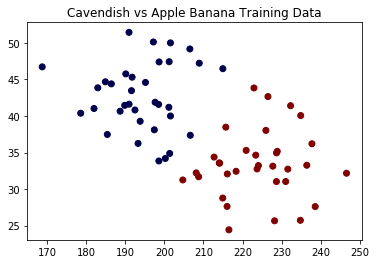

In [72]:
plt.scatter(X_train['length'], X_train['width'], c=y_train,
            cmap='seismic')
plt.title("Cavendish vs Apple Banana Training Data");

# NOTE TO SELF: Blue is cat zero, red is cat one

In the following plot of the data we will use as test data, we chose to set the `alpha` channel for the dots at 0.15 which makes the dots largely transparent, so that they are visually distinct. Later we will plot the training data and the test data on the same graph and that transparencey will help to segregate them visually.

AND, although we know what category each of these falls into, we chose to keep them all the same color, since we want to rely upon the model to categorize them.

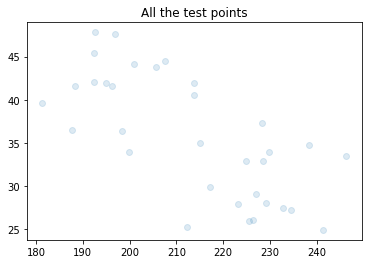

In [73]:
plt.title("All the test points")
plt.scatter(X_test['length'], X_test['width'], alpha=0.15);

## Choose the Model

In this case, we have already decided upon using the GaussianNB model, so importing it is straightforward. But if we aren't sure what model we want we can always refer back to the [API Reference](https://scikit-learn.org/stable/modules/classes.html).

In [74]:
from sklearn.naive_bayes import GaussianNB

## Choose Appropriate Hyperparameters

This model doesn't require any hyperparameters, so we simply call the `GaussianNB` class.

In [75]:
model = GaussianNB()

## Fit the Model

Here we supply the **features matrix** and a **target array** that we generated above. Notice that it immediately provides a summary of the hyperparameters (in this case, the defaults) that were supplied.

In [76]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Apply the Model

We can now supply the test features matrix in expectation that the model will produce an array of labels (categories): one label for each sample in the features matrix.

In [77]:
y_pred = model.predict(X_test)

In [78]:
y_pred.shape

(33,)

In [79]:
y_pred[:10]

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0])

## Examine the results

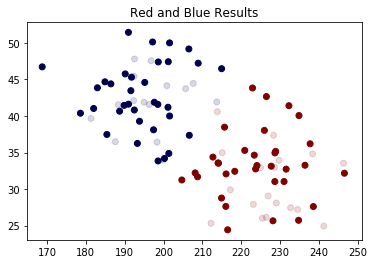

In [80]:
plt.title("Red and Blue Results")

plt.scatter(X_train['length'], X_train['width'], c=y_train,
            cmap='seismic')

plt.scatter(X_test['length'], X_test['width'], c=y_pred,
            cmap='seismic',
            alpha=0.15);

# Gotchas
---

A number of problems arose the first time I dove into this model:
    
**Naming conventions**: I ran into snags with naming conventions. My data was randomly generated and I just pictured it as **x and y coordinates**. But having x values and y values on my graph (and in my head) threw everything out of whack when I tried to translate that to the `X` and `y` inputs and outputs that are commonly usd in models and in statistics, etc. If my data were naturally labeled as anything else, it might have been less painful to mentally translate:

|Alternate|Labels|
|:---|:---|
|lat|long|
|price|quantity sold|
|passing yards|wins|

**Understanding the data formats**: I kept messing up the format of the data. The `X` inputs (`X_train`, `X_test`) needed to be a 2D matrix and I kept trying to feed it 1D items (this was not helped by the naming problem from above). 

**Making graphs shouldn't distract you from the machine learning**: Above, we have a number of dataviz steps intermixed with our machine learning steps. And there is the possibility that it might lead to confusion about what parts are *critical* to the machine learning and which parts are *nice to have*. Presuming your data is prepared properly, **these four lines** predict the category OR label for all the values in the test set. 

```python
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
```

**Sometimes starting too big is too confusing**: I often recommend that students pare back their problem to a small handful of items so that they can really see what is happening. Since this model takes a pair of coordinates and returns a label to say whether the coordinates fit in the **blue** category OR the **red** category, let's take a pair of coordinates that we know should fit clearly into the blue category (i.e. something above the dividing line.

In [81]:
# 83  187.600405  36.487954     0

y_pred_single = model.predict([[187, 36]])
y_pred_single

array([0])

Now, let's take a pair of points (one in each category **red** and **blue**) and ensure that we get two different labels:

In [82]:
# 28  231.568879  32.733688    1
# 93  190.142527  45.764529    0

y_pred_pair = model.predict([[232, 33],
                             [190, 46]])
y_pred_pair

array([1, 0])

# Deep Dive
---

N/A

# How to learn more: tips and hints
---

What should you do to advance your skills?

**Play with the tools**:

<img src='../universal_images/changing_stuff.jpg' width='350'>

**Get familiar with your favorite graphing library**: being able to visualize the results will help you get a sense of whether your model is accurately predicting. It will also help you to better succeed at the ultimate goal of data science:

> Data science is meant to inform and thus enable action.

meet the expection that data science is supposed to meet: to inform.

**Read the docs**: yeah... I know they can be scary. Regardless, the more time you spend reading the docs, the faster you will begin to better understand the nuances of different models, which models apply in which situations. Don't be afraid if there are words in there that you don't understand. The vocabulary will come, given time and plenty of exposure. From this lesson, several good resources include:
* [API Reference](https://scikit-learn.org/stable/modules/classes.html)
* [Gaussian Naive Bayes Page](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
* [User Guide: Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

**Don't just copy-paste other people's models**: go home, find a dataset with values that are suitable to a given model and create your own model. Then put in some test values and see if it predicts properly.

**Read the error messages**: They are sometimes scarier than the docs but they will often give you some insight into the nature of the problem.

# Experience Points!
---

# Read the docs...

Explore the docs related to Linear Models and Overfitting for about 3 - 4 minutes.

[**Linear Models (link)**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Find answers to the following:

* How many sample graphs do they offer up as examples?
* What is the best possible .score() value and what is the worst possible .score() value?

[**Overfitting (link)**](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)

* What technique can be used to quantitatively evaluate underfitting/overfitting?

---
When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# References
---

Below are references that may assist you in learning more:
    
|Title (link)|Comments|
|---|---|
|[API Reference](https://scikit-learn.org/stable/modules/classes.html)||
|[Gaussian Naive Bayes Page](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)||
|[User Guide: Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)||